In [8]:
import os
import sys

# uncomment and replace with correct path if there are import errors
# sys.path.append("/path/to/surface-sampling/")
# sys.path.append("/path/to/NeuralForceField/")
# os.environ["LAMMPS_POTENTIALS"] = "/path/to/lammps/potentials/"
# os.environ["LAMMPS_COMMAND"] ="/path/to/lammps/src/lmp_serial"
# os.environ["ASE_LAMMPSRUN_COMMAND"] = os.environ["LAMMPS_COMMAND"]

from mcmc import MCMC
from mcmc.slab import initialize_slab

from ase.calculators.lammpsrun import LAMMPS # ase version of LAMMPS

from time import perf_counter


Initialize test slab and parameters

In [9]:
# initialize some parameters first
# Cu alat from https://www.copper.org/resources/properties/atomic_properties.html
Cu_alat = 3.6147
element = 'Cu'
slab = initialize_slab(Cu_alat, elem=element, size=(2, 2, 2), miller=(1, 0, 0))

surface_name = 'Cu(100)'
chem_pot = 0 # eV
alpha = 0.99 # slowly anneal
temp = 1.0 # in terms of kbT
num_sweeps = 50

Set up LAMMPS (calculator)

In [10]:
# use LAMMPS
optimizer = 'LAMMPS'
parameters = {
    'pair_style': 'eam',
    'pair_coeff': ['* * Cu_u3.eam']
}

# set up the LAMMPS calculator
potential_file = os.path.join(os.environ["LAMMPS_POTENTIALS"], 'Cu_u3.eam')
lammps_calc = LAMMPS(files=[potential_file], keep_tmp_files=False, keep_alive=False, tmp_dir=os.path.join(os.path.expanduser('~'), "tmp_files"))
lammps_calc.set(**parameters)

{'pair_style': 'eam', 'pair_coeff': ['* * Cu_u3.eam']}

Perform MCMC and view results. Detailed results can be found in the corresponding run in the `Cu(100)/` folder.

2023-05-20 14:18:56,758|INFO|Running with num_sweeps = 50, temp = 1.0, pot = 0, alpha = 0.99
2023-05-20 14:18:56,759|INFO|using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b546514f0>
2023-05-20 14:18:56,759|INFO|there are 8 atoms in pristine slab
2023-05-20 14:18:56,760|INFO|adsorbate(s) is(are) Cu
2023-05-20 14:18:56,859|INFO|In pristine slab, there are a total of 16 sites
2023-05-20 14:18:56,888|INFO|running for 16 iterations per run over a total of 50 runs
2023-05-20 14:18:56,891|INFO|In sweep 1 out of 50
2023-05-20 14:18:57,385|INFO|optim structure has Energy = -38.6616420816706
2023-05-20 14:18:57,390|INFO|In sweep 2 out of 50
2023-05-20 14:18:57,925|INFO|optim structure has Energy = -37.88816607050683
2023-05-20 14:18:57,935|INFO|In sweep 3 out of 50
2023-05-20 14:18:58,483|INFO|optim structure has Energy = -44.02810025746928
2023-05-20 14:18:58,489|INFO|In sweep 4 out of 50
2023-05-20 14:18:59,030|INFO|optim structure has Energy = -44.02810025746928
2023-05-20 14:

Time taken = 27.651959958020598 seconds


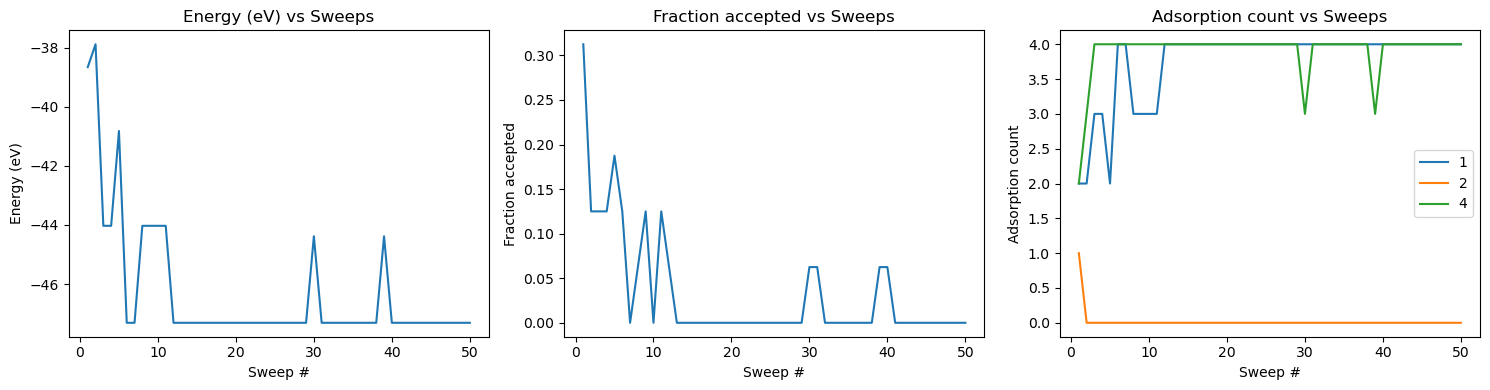

In [11]:
mcmc = MCMC(calc=lammps_calc, canonical=False, testing=False, surface_name=surface_name, 
            element=element, adsorbates=element, 
            relax=False, optimizer=optimizer) # no relaxation

start = perf_counter()
# call the main function
mcmc.mcmc_run(num_sweeps=num_sweeps,
    temp=temp,
    pot=chem_pot,
    alpha=alpha,
    slab=slab
    )

stop = perf_counter()
print(f"Time taken = {stop - start} seconds")